In [1]:
from package_main import LookupTableManager
import pandas as pd

In [2]:
# Initialize the lookup table manager with the path to your shapefile
lookup_manager = LookupTableManager(mode='BZR_ID')

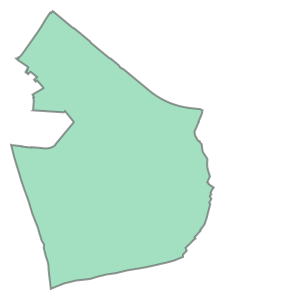

In [3]:
# Now you can use the `get_value` method to perform lookups
value = lookup_manager.get_value(id='084012')
value

In [4]:
# Now you can use the `get_value` method to perform lookups
value = lookup_manager.get_value(id='Rudow', id_col='BZR_NAME', return_col='BZR_ID')
value

'084012'

In [5]:
import geopandas as gpd
check_df = gpd.read_file('lor_shp_2021/lor_bzr.shp')
check_df.head()

BZR_ID           BZR_NAME  \
0  084012              Rudow   
1  083010   Gropiusstadt Ost   
2  083009  Gropiusstadt West   
3  082008             Buckow   
4  082007              Britz   

                                            geometry  
0  POLYGON ((396597.490 5811370.953, 396601.640 5...  
1  POLYGON ((396188.572 5810213.427, 396191.009 5...  
2  POLYGON ((394298.846 5809626.409, 394372.388 5...  
3  POLYGON ((392224.426 5809260.778, 392271.519 5...  
4  POLYGON ((392224.426 5809260.778, 392224.270 5...

In [6]:
df = check_df[['BZR_ID']]
df.columns = ['id']
df.head()

id
0  084012
1  083010
2  083009
3  082008
4  082007

In [7]:
gdf = lookup_manager.attach_geometries_to_dataframe(df, id_col='id')
gdf

id                                           geometry
0    084012  POLYGON ((396597.490 5811370.953, 396601.640 5...
1    083010  POLYGON ((396188.572 5810213.427, 396191.009 5...
2    083009  POLYGON ((394298.846 5809626.409, 394372.388 5...
3    082008  POLYGON ((392224.426 5809260.778, 392271.519 5...
4    082007  POLYGON ((392224.426 5809260.778, 392224.270 5...
..      ...                                                ...
138  091002  POLYGON ((395458.415 5816673.583, 395474.878 5...
139  091001  POLYGON ((396300.128 5815697.298, 396287.252 5...
140  024006  POLYGON ((394813.963 5818587.973, 394803.335 5...
141  094013  POLYGON ((402973.702 5809610.817, 402968.767 5...
142  115012  POLYGON ((397744.137 5815840.409, 397729.639 5...

[143 rows x 2 columns]

In [8]:
gdf.explore()

In [9]:
df['test1'] = df['id'].apply(lambda id: lookup_manager.get_value(id=id, return_col="BZR_NAME"))
df['test2'] = df['id'].apply(lambda id: lookup_manager.get_value(id=id, return_col="BZR_ID"))
df['geometry'] = df['id'].apply(lambda id: lookup_manager.get_value(id=id, return_col="geometry"))
df.head()

id                                           geometry  \
0  084012  POLYGON ((396597.49 5811370.953, 396601.64 581...   
1  083010  POLYGON ((396188.572 5810213.427, 396191.009 5...   
2  083009  POLYGON ((394298.846 5809626.409, 394372.388 5...   
3  082008  POLYGON ((392224.426 5809260.778, 392271.519 5...   
4  082007  POLYGON ((392224.426 5809260.778, 392224.27 58...   

               test1   test2  
0              Rudow  084012  
1   Gropiusstadt Ost  083010  
2  Gropiusstadt West  083009  
3             Buckow  082008  
4              Britz  082007

<AxesSubplot: >

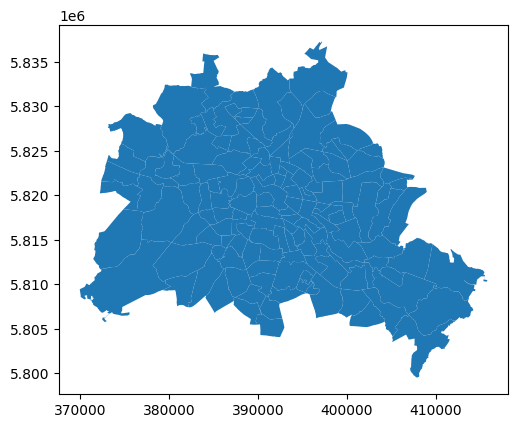

In [10]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')
# Set the CRS to EPSG:4326 explicitly if it's not already set
# gdf.crs = "EPSG:4326"
# gdf = gdf.to_crs("EPSG:25833")
gdf.plot()

In [11]:
gdf.explore()

In [12]:
check_df.crs
# = original_gdf.crs

<Projected CRS: EPSG:25833>
Name: ETRS89 / UTM zone 33N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 12°E and 18°E: Austria; Denmark - offshore and offshore; Germany - onshore and offshore; Norway including Svalbard - onshore and offshore.
- bounds: (12.0, 46.4, 18.01, 84.42)
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [13]:
gdf.crs